# Assignment sheet 3: Numerical Computation and Prinicipal Component Analysis (Deadline: Nov 24, 23:59)

In [1]:
# Set notebook to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Computational Issues with Softmax $~$ (3 points)

In the lecture you were introduced to the softmax function which is used to generate probabilities corresponding to the output labels. Typically, the input to the softmax function is a vector of numerical values over the labels and the output is a vector(of same dimension as the input vector) of corresponding probabilities.
**Softmax function is given by,** $~$
$$Softmax(x)_i = \frac{exp(x_i)}{\sum_{j=1}^n exp(x_j)}$$

**Numerical issues might occur when computing softmax functions on a computer which can perform computations
only upto a certain precision.** [Suggested reading $-$ [chapter 4.1 of DeepLearningBook](http://www.deeplearningbook.org/contents/numerical.html)]

$1$. Name these numerical issues and explain them. ($1$ points)

$\frac{\infty}{\infty}$ occurs when the input to softmax $x_i \xrightarrow{}\infty $ and $x_i \xrightarrow{} -\infty $ i.e. when the absolute value of any input are very large. Even if each of them is not large but the sum is large due to huge size of data, then divide by zero error occurs

$2$. Suggest a remedy (with explanation on why it works) to overcome these numerical issues occuring with Softmax computation. Prove that this remedy actually does not change the softmax criteria. Describe a situation where the proposed remedy still fails to remove instability. ($1$ point)

$ x_i - max(x_i) $ brings the maximum to zero. So, this removes the problem when the large element of $x_i$ causes $ exp(x_i) \xrightarrow{} \infty $
$ Softmax(x)_i = \frac{exp(x_i - max(x_i))}{\sum_{j=1}^n exp(x_j - max(x_i))} $
$\implies \frac{\frac{exp(x_i)}{exp(max(x_i))}}{\frac{\sum_{j=1}^n exp(x_j)}{exp(max(x_i))}} \implies \frac{exp(x_i)}{\sum_{j=1}^n exp(x_j)} $

This fails when we have very large negative values too. Then, when we take it's difference with a very large maximum value, then $ min(x_i) - max(x_i) $ blows up again. But atleast we may prevent Overflow. 


$3$. First write a naive Softmax implementation, in numpy, that can produce numerical instability. Then write a modified Softmax implementation which is numerically stable.  ($0.5 + 0.5 = 1$ points)

In [2]:
import numpy as np

# TODO : Define inputs

def softmax_naive(inputs):
    """Unstable Softmax function"""
    inputs_exp = np.exp(inputs)
    return inputs_exp / np.sum(inputs_exp)

def softmax_modified(inputs):
    """Stable Softmax function"""
    
    inputs_exp = np.exp(inputs - np.max(inputs))
    return inputs_exp / np.sum(inputs_exp)

x = np.random.rand(10);
y1 = softmax_naive(x)
y2 = softmax_modified(x)
print(np.sum(y1-y2))
# print(y2)

9.71445146547e-17


### Principal Component Analysis $~$ (7 points)

$4$. Is PCA supervised or unsupervised, logically explain your answer. Which is the tunable parameter in PCA?
Briefly explain the role of this parameter in PCA.  ($1+0.5+0.5 = 2$ points)

PCA is unsupervised. Because the data is not labelled. PCA is just for reducing the dimensions and for lossy data compression. It shows the structure of data in lower dimensions
The k number of dimensions to be returned as an output after compression is tunable. For example we can choose $ k \in [1, n] $ as n then we have the same output as input. If we have k as 1 then we get the eigenvector belonging to largest eigenvlaue as output.

$5$. Consider the following data:

setA: ${\bf x}^{(1)}$=$(2, 4)^T$, ${\bf x}^{(2)}$=$(2, 2)^T$, ${\bf x}^{(3)}$=$(3, 1)^T$, ${\bf x}^{(4)}$=$(5, 1)^T$ 

setB: ${\bf x}^{(1)}$=$(-1, 1)^T$, ${\bf x}^{(2)}$=$(-2, 2)^T$, ${\bf x}^{(3)}$=$(-1, 3)^T$, ${\bf x}^{(4)}$=$(-1, 4)^T$

$(a)$ Compress the above sets of vectors into a one-dimensional set using PCA, i.e., derive the encoder function $f(x)=D^{T}x$ as defined in the lecture. Then apply f to the datasets inorder to compress them. ($1.5 + 1.5$ points)



$(b)$. For both the above sets sketch the corresponding datasets in a separate figure. 
Also include the reconstructed vectors into the corresponding figures. ($2$ points)

[[ 0.70710677]
 [-0.70710677]]
[[-1.41421354]
 [ 0.        ]
 [ 1.41421354]
 [ 2.82842708]]


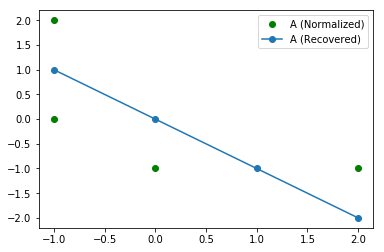

[[ 1.46117603]
 [ 0.58313234]
 [-0.52548814]
 [-1.51882023]]


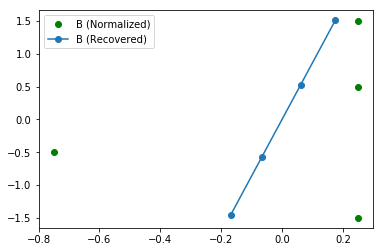

In [7]:
import matplotlib.pyplot as plt

A = np.array([[2, 4], [2, 2], [3, 1], [5, 1]], np.float32)
B = np.array([[-1, 1], [-2, 2], [-1, 3], [-1, 4]], np.float32)
nA = A.shape[0]
nB = B.shape[0]

def pca(array, dim):
    # Mapping of d dimensional array to lesser dimensions
    
    n = array.shape[0]
    d = array.shape[1]
    mean = sum(array)/n
    array = array - mean # Subtract mean
    cov = np.matmul(array.T, array) # cov(X) = X'X
    
    # Compute the eigenvalues and eigenvectors of covariance matrix
    eigVal, eigVec = np.linalg.eig(cov)
    
    # Indices of sorted eigenvalues
    eigValSortInd = np.argsort(eigVal)
    
    # Reduction matrix D
    D = np.ndarray([d, dim]);
    
    # Return the k eigenvectors corresponding to largest eigenvalues
    for i in range(dim):
        D[0:d, i] = eigVec[0:d, eigValSortInd[d-(i+1)]]

    return D;

DA = pca(A,1)
print(DA)
reduced = np.matmul(A, DA)
print(reduced)
recovered = np.matmul(reduced, DA.T)

A = A - sum(A)/A.shape[0]
B = B - sum(B)/B.shape[0]

plt.figure(1)
plt.plot(A[0:nA,0], A[0:nA,1], 'go', label = 'A (Normalized)')
plt.plot(recovered[0:nA,0], recovered[0:nA,1], 'o-', label = 'A (Recovered)')
plt.legend(loc='best')
plt.show()

DB = pca(B,1)
reduced = np.matmul(B, DB)
print(reduced)
recovered = np.matmul(reduced, DB.T)

plt.figure(2)
plt.plot(B[0:nB,0], B[0:nB,1], 'go', label = 'B (Normalized)')
plt.plot(recovered[0:nB,0], recovered[0:nB,1], 'o-', label = 'B (Recovered)')
plt.legend(loc='best')
plt.show()

### Gradient descent and Newton's method $~$ (5 points)

**Suppose $f(x) = 2x^3 - 5x + 6$ **

$6$. Write down the mathematical expressions for minimizing f(x) using Gradient descent(GD) and then using Newton's Method(NM). ($1$ points)

Gradient descent:
$ x_{k+1} = x_k - \epsilon \nabla {f(x)}_k $ where $ \nabla f(x) $ is the gradient of f with respect to x and $ \epsilon $ is the learning rate

Newton's Method:
$ x_{k+1} = x_k - H_{f(x_k)}^{-1} \nabla {f(x)}_k $ where $ H_{f(x)} $ is the Hessian matrix

$7$. Report the updated values of x, both for GD and NM, at $x = 0$. what do you observe? ($1$ points)

Gradient Descent:
$ x_1 = x_0 - \epsilon \nabla {f(x)}_0 \implies x_1 = 0 - \epsilon (6x^2 - 5) \implies x_1 = 5 \epsilon $

Newton's Method:
$ x_{1} = x_0 - H_{f(x_0)}^{-1} \nabla {f(x)}_0 \implies x_1 = 0 - (12x)^{-1} (6x^2 - 5) \xrightarrow{x=0} x_1 = \frac{0}{0} Error! $

$8$. Perform GD and NM for the above function using Tensorflow. ($1.5 + 1.5$ points)

/home/zee/miniconda3/envs/nnia/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


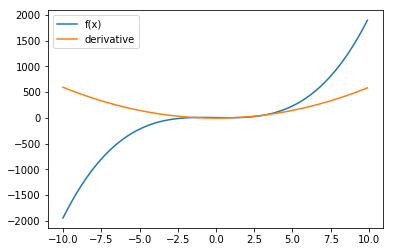

In [13]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# TODO : Implement Gradient Descent with Tensorflow

# Gradient Descent Parameters
epsilon = 0.005
x0 =  np.random.rand(1) # Random initialization
step = 0

# Specify an input x to the comp. graph
values = np.arange(-10.0,10.0,0.1)
_shape = values.shape
x = tf.Variable(values, tf.float32)

def f(x):
    return 2*x**3 - 5*x + 6


# Take derivative of f with respect to x
gradient = tf.gradients(f(x), x)
### Execute the comp. graph
# Create a TensorFlow session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Evaluate the function value and its derivative for values from -10 to 10 with step 0.1
fx = sess.run(f(x), {x: values})
der = sess.run(gradient)
der = np.array(der).reshape(_shape) # Reshape the der to be same as values

#while(1):
#    f = f(x0)
#    x1 = x0 - epsilon * 
    
# Plot the function f (use matplotlib library)
fig1 = plt.figure(1)
plt.plot(values, fx, label='f(x)')
plt.legend(loc='best')
fig1.show()

# Plot the derivative of the function f
plt.plot(values, der, label='derivative')
plt.legend(loc='best')
fig1.show()

In [15]:
import numpy as np
import tensorflow as tf

# TODO : Implement Newton's Method with Tensorflow

### Gradient descent computation and visualisation $~$ (3 + 2 points)

#### Now visualize the Gradient Descent algorithm to fit a straight line to data generated using  $y = \theta_{true}x$ $~$, i.e., use this expression to first produce the data (see code below the lines starting with m=20 and following) and then try to fit a straight line to this data. Fitting a straight line means that you have to approximate this $\theta_{true}$ parameter using the hypothesis or predictive model by minimizing the cost function defined below.

**For this task you should minimize a cost function of the form:**
$$\frac{1}{2m}\sum_{i=1}^m [h_{\theta}(x^i)-y^i]^2$$
where
- $x^i$ is the $i^{th}$ input 

- $y^i$ is the true $i^{th}$ response or output

- $h_{\theta}(x)$ is the hypothesis or predictive model

#### Assume $~$ $h_{\theta}(x) = \theta x$ $~$ to be the hypothesis or predictive model

In [16]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate the true data which is to be fitted
m = 20                      # number of data points for x
theta_true = 0.5            # corresponds to the true slope
x = np.linspace(-1,1,m)     # x values or inputs
y = theta_true * x          # True response


# Create a subplot window
# On the left window plot the true data and the approximation 
# that you obtain with different estimates of the slope theta_true
# and on the right window plot the cost function 

# TODO : Create the subplot window

def hypothesis(x, theta):
    """Our "hypothesis or predictive model", a straight line through the origin."""
    
    # TODO : Implement
    pass

def cost_func(theta):
    """The cost function describing the goodness of fit."""  
    
    # TODO : Implement
    pass


# First construct a grid of theta parameter and their corresponding
# cost function values.
theta_grid = np.linspace(-0.2,1,50)
# Find the cost function values to be stored in J_grid
# TODO : Create J_grid


# Plot the cost function as a function of theta.
# TODO : Do the plot


# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta = 0.
N = 10
alpha = 1 
# this is just a starting value of alpha, 
# you must consider different values of alpha (try using large values)
# and redo the steps below to generate different plots
theta = [0]


# TODO :Compute the N steps down the steepest gradient

# TODO : Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the left window of the subplot in a matching colour.

# TODO : Put the labels, titles and a legend.

#### Now assume that the data is generated using  $y = \theta_1x + \theta_0$
** Following the same logic you applied for the above task define a predictive model 
and perform 5 steps of gradient descent with learning rate alpha = 0.7 **

In [17]:
# Generate the true data which is to be fitted
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# Create the sub-plot: left window is the data, right window will be the cost function.
# TODO


def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    
    # TODO : Implement
    pass

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    
    # TODO : Implement
    pass


# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)

# TODO : Compute the cost function values


# TODO : Do a labeled contour plot for the cost function on right window of the above subplot


# TODO : Take 5 steps with learning rate alpha = 0.7 down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).


# TODO : Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the left window in a matching colour.


# TODO : Add the labels, titles and a legend to the plot.

### Linear Algebra Bonus
- [Additional material - Linear Algebra Basics](http://www.cs.ubc.ca/~schmidtm/Documents/2009_Notes_LinearAlgebra.pdf)

#### Trace of a Matrix $~$ (3 points)
- [Reading material on Trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)

Prove that the trace of a ***symmetric positive definite*** matrix is the sum of its eigenvalues.    ($0.5$ points)

$ tr(A) = \sum_{i=1}^n a_{ii} $  A positive definite matrix has positive diagonal entries and thus trace is positive. $ \implies a_{ii}>0 \; \forall i\in [1,n] $

The eigen-decomposition of $ A = V\Lambda V^T$ where V is orthonormal $\implies V^{-1} = V^T $ and $ ||v_i||_2^2 = 1 $

$\implies A = \begin{bmatrix}
\Sigma_{i=1}^{n}\lambda_i v_{1i}^2 &\Sigma_{i=1}^{n}\lambda_i v_{1i} v_{2i} &\cdots &\Sigma_{i=1}^{n}\lambda_i v_{1i} v_{ni} \\
\Sigma_{i=1}^{n}\lambda_i v_{2i} v_{1i} &\Sigma_{i=1}^{n}\lambda_i v_{2i}^2 &\cdots &\Sigma_{i=1}^{n}\lambda_i v_{2i} v_{ni} \\
\vdots & \vdots & \ddots & \vdots\\
\Sigma_{i=1}^{n}\lambda_i v_{ni} v_{1i} &\Sigma_{i=1}^{n}\lambda_i v_{ni} v_{2i} &\cdots &\Sigma_{i=1}^{n}\lambda_i v_{ni}^2
\end{bmatrix}$ and $tr(A) = \Sigma_{j=1}^{n}(\lambda_j \Sigma_{i=1}^nv_{ij}^2) \implies \Sigma_{j=1}^n \lambda_j||v_j||_2^2 \implies $ $\Sigma_{j=1}^n \lambda_j\ $

Suppose $\mathbf{Y}$ is a $n \times m$ matrix with $m \leq n$ and has ***full rank***, then

$(a)$.   Give the rank of $\mathbf{Y}$.                                                                 ($0.5$ points)

Since $\mathbf{Y}$ has full rank, the rank should be $m$

$(b)$.  Show that trace of $\mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T}$ = rank($\mathbf{Y}$)                                     ($1$ points)

Using the property of trace, $tr(AB) = tr(BA) \implies tr(\mathbf{Y}[(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T}]) \implies tr((\mathbf{Y}^T\mathbf{Y})^{-1}[\mathbf{Y}^{T}\mathbf{Y}]) \implies tr(\mathbf{I}_{mxm}) \implies m $ which is the rank of $\mathbf{Y}$

$(c)$. Prove that $\mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T}$ is the projection matrix w.r.t space defined by $\mathbf{Y}$.     ($1$ points)

$ (\mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T}) (\mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T}) \implies \mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}[\mathbf{Y}^{T}\mathbf{Y}](\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T} \implies \mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}\underbrace{\mathbf{Y}^{T}\mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}}_\text{I}\mathbf{Y}^{T} \implies \mathbf{Y}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}^{T} $

Thus, it is a projection matrix w.r.t space defined by $\mathbf{Y}$

#### Jacobian $~$ (3 points)

***[Reading material on Jacobian](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant)***

Show that the Jacobian determinant of $\frac{\partial(fg, h)}{\partial(u, v)}$ is equal to $\frac{\partial(f, h)}{\partial(u, v)}g + f\frac{\partial(g, h)}{\partial(u, v)}$,

where $f$,$g$, and $h$ are functions of $u$ and $v$ (i.e., $f(u,v)$, $g(u,v)$, and $h(u,v)$)   ($3$ points)

Hint: Use the property $\frac{\partial(y, x)}{\partial(u, v)} = \frac{\partial(y)}{\partial(u)}\frac{\partial(x)}{\partial(v)}-\frac{\partial(y)}{\partial(v)}\frac{\partial(x)}{\partial(u)}$

$\frac{\partial(fg, h)}{\partial(u, v)} = \frac{\partial(fg)}{\partial(u)}\frac{\partial(h)}{\partial(v)}-\frac{\partial(fg)}{\partial(v)}\frac{\partial(h)}{\partial(u)} \implies (f\frac{\partial(g)}{\partial(u)} + g\frac{\partial(f)}{\partial(u)})\frac{\partial(h)}{\partial(v)} - (f\frac{\partial(g)}{\partial(v)} + g\frac{\partial(f)}{\partial(v)})\frac{\partial(h)}{\partial(u)} \implies g(\frac{\partial(f)}{\partial(u)}\frac{\partial(h)}{\partial(v)} + \frac{\partial(f)}{\partial(v)}\frac{\partial(h)}{\partial(u)}) - f(\frac{\partial(g)}{\partial(u)}\frac{\partial(h)}{\partial(v)} + \frac{\partial(g)}{\partial(v)}\frac{\partial(h)}{\partial(u)}) \implies g\frac{\partial(f, h)}{\partial(u, v)} + f\frac{\partial(g, h)}{\partial(u, v)} $

#### Hessian $~$ (2 points)
***[Reading material on Hessian](https://en.wikipedia.org/wiki/Hessian_matrix)***

Let $\mathbf{M}=\left[\begin{array}{cccc}
   5 & 1 & 0 & 1\\
   1 & 4 & 1 & 0\\
   0 & 1 & 3 & 1\\
   1 & 0 & 1 & 2\\
  \end{array}\right]$
  
denote the Hessian matrix at particular point for a particular function.

$(a)$. What properties of the functional can you infer from the above information.(give mathematical reasons) ($1$ point)

$\mathbf{M}$ is positive semi-definite since it is

strictly diagonally dominant i.e. $m_{ii} \geq \Sigma_{i=1, i\neq j}^n m_{ij} $, 

symmetric $\mathbf{M} = \mathbf{M}^T$, 

positive diagonals $m_{ii} > 0$

Thus, it is convex at the particular point.

$(b)$. Provide a generic mathematical representation (e.g. the generic representation of a straight line is $ax+by+c=0$) for the above function. ($1$ point)